### Projet IGL3/IDS3 : Analyse Numérique Matricielle dans le cadre de la gestion de bases de données bibliographiques 

In [70]:
import numpy as np
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import time
from scipy.linalg import qr

In [71]:
# 1ère Partie : Calcul de score de document : Sans utilisation de la décomposition SVD
# Modèle de l'espace vectoriel

def matrice_termes_documents(termes, documents):
    """
      Cette méthode permet de construire la matrice termes-documents.
    """
    matrice = np.zeros((len(termes), len(documents)), dtype=int)

    termes_sorted = sorted(termes)
    termes_sorted = [terme.lower() for terme in termes_sorted]

    documents_termes = []

    for doc in documents :
        if isinstance(doc, str) :
            termes_doc = doc.lower().split()
        else :
            termes_doc = doc

        documents_termes.append(termes_doc)

    for i , terme in enumerate(termes_sorted) :
        for j, doc_termes in enumerate(documents_termes) :
            if terme in doc_termes :
                matrice[i][j] = 1

    return matrice 

In [72]:
def afficher_matrice(matrice) :
    """
      Cette méthode permet d'afficher la matrice termes-documents.
    """
    for i in range(matrice.shape[0]) :
        for j in range(matrice.shape[1]) :
            print(matrice[i][j], end = " ")
        print()

In [73]:
#Test de la méthode : 
# Génération de la matrice termes-documents (Exemple 1)
documents = [
    "Algèbre linéaire et matrices",
    "Analyse réele et suites",
    "Probabilités et statistiques",
    "Matrices et déterminants"
]

termes = [
    "algèbre",
    "matrices",
    "analyse",
    "suites",
    "probabilités",
    "statistiques",
    "déterminants"
]


matrice = matrice_termes_documents(termes, documents)
afficher_matrice(matrice)

1 0 0 0 
0 1 0 0 
0 0 0 1 
1 0 0 1 
0 0 1 0 
0 0 1 0 
0 1 0 0 


In [74]:


def requete_vers_colonne(termes, requete):
    vecteur = [0] * len(termes) 
    termes_sorted = sorted(termes)
    mots_requete = requete.lower().split()
    
    for i, terme in enumerate(termes_sorted):
        for mot in mots_requete:
            if fuzz.ratio(terme.lower(), mot) >= 90:
                vecteur[i] = 1  
                break  
    
    return vecteur


In [75]:
#Test de la méthode :
requete = "Algèbre matrice"
vecteur_colonne = requete_vers_colonne(termes, requete)
vecteur_colonne

[1, 0, 0, 1, 0, 0, 0]

In [76]:
def score_document(j , matrice , q):
    """
      Cette méthode permet de calculer le score d'un document j par rapport à une requête q.
    """
    vect_doc = matrice[:, j]
    norme_req = np.linalg.norm(q)
    if norme_req == 0:
        return 0
    
    norme_doc = np.linalg.norm(vect_doc)
    if norme_doc == 0:
        return 0
    
    produit_scalaire = np.dot(vect_doc, q)

    score =  float(produit_scalaire / (norme_doc * norme_req))
    return round(score, 2)

In [77]:
# Affichage des scores de documents : 
def tab_score(matrice , q):
    """
      Cette méthode permet de calculer le score de chaque document par rapport à la requête q.
    """
    scores = []
    for j in range(matrice.shape[1]):
        score = score_document(j, matrice, q)
        scores.append(score)
    return scores

In [78]:
def resultat_requete(matrice, q, score_min=0.8):
    """
    Affiche les scores strictement positifs des documents par rapport à la requête q,
    triés par ordre croissant, et détermine le document le plus pertinent.
    
    Args:
        matrice: Matrice représentant les documents.
        q: Requête.
        score_min: Seuil minimum pour considérer un document pertinent (par défaut 0.8).
    """
    # Calculer les scores
    scores = tab_score(matrice, q)
    
    # Créer une liste de tuples (indice, score) pour les scores > 0
    scores_positifs = [(i, score) for i, score in enumerate(scores) if score > 0]
    
    # Trier par score en ordre croissant
    scores_positifs = sorted(scores_positifs, key=lambda x: x[1], reverse=True)
    
    # Afficher les scores positifs
    if scores_positifs:
        for i, score in scores_positifs:
            print(f"Document {i+1} : {score}")
    else:
        print("Aucun document avec un score strictement positif")
    
    # Identifier le document le plus pertinent
    if len(scores) > 0 and max(scores, default=0) > score_min:
        indice_max = scores.index(max(scores))
        print(f"\nLe document le plus pertinent est le Document {indice_max+1} avec un score de {scores[indice_max]}")
    else:
        print("\nAucun document disponible pour évaluation ou score insuffisant")

In [79]:
#Test des méthodes (Sans utilisation de la décomposition SVD) :
# Exemple 1 : 

requete = "Algèbre matrice"
vecteur_colonne = requete_vers_colonne(termes, requete)

print("---------------AFFICHAGE DE LA MATRICE---------------\n")
matrice = matrice_termes_documents(termes, documents)
afficher_matrice(matrice)
print("\n---------------TRAVAIL DE LA REQUETE---------------\n")
# Affichage des scores de documents :
resultat_requete(matrice, vecteur_colonne, score_min = 0.8)


---------------AFFICHAGE DE LA MATRICE---------------

1 0 0 0 
0 1 0 0 
0 0 0 1 
1 0 0 1 
0 0 1 0 
0 0 1 0 
0 1 0 0 

---------------TRAVAIL DE LA REQUETE---------------

Document 1 : 1.0
Document 4 : 0.5

Le document le plus pertinent est le Document 1 avec un score de 1.0


In [80]:
# Avant le test de l'exemple 3 : Génération de la matrice termes-documents (Exemple 3)
documents_exemple_3 = [
    "Croissance PIB Investissement",
    "Inflation Monnaie Dépression",
    "Commerce Exportation Croissance",
    "Emploi Chômage Salaire",
    "Impôts Fiscalité Budget",
    "Géologie Faille Tremblement",
    "Volcan Séisme Plaque tectonique",
    "Dépression Bassin Erosion",
    "Stratigraphie Couches Roche",
    "Gisement Forage Bassin"
]

termes_exemple_3 = [
    "Bassin",
    "Chômage",
    "Croissance",
    "Dépression",
    "Fiscalité",
    "Séisme"
]

matrice_exemple_3 = matrice_termes_documents(termes_exemple_3, documents_exemple_3)
afficher_matrice(matrice_exemple_3)

0 0 0 0 0 0 0 1 0 1 
0 0 0 1 0 0 0 0 0 0 
1 0 1 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 1 0 0 
0 0 0 0 1 0 0 0 0 0 
0 0 0 0 0 0 1 0 0 0 


In [81]:
# Exemple 3 (REQUERTES) :
requete_exemple_3_1 = "dépression croissance"
requete_exemple_3_2 = "bassin fiscalité"

In [82]:
#Test de la méthode (EXEMPLE 3) :
vecteur_colonne_exemple_3_1 = requete_vers_colonne(termes_exemple_3, requete_exemple_3_1)
vecteur_colonne_exemple_3_2 = requete_vers_colonne(termes_exemple_3, requete_exemple_3_2)

print("\n---------------TRAVAIL DE LA REQUETE 1---------------\n")
resultat_requete(matrice_exemple_3, vecteur_colonne_exemple_3_1, score_min = 0.8)



---------------TRAVAIL DE LA REQUETE 1---------------

Document 1 : 0.71
Document 2 : 0.71
Document 3 : 0.71
Document 8 : 0.5

Aucun document disponible pour évaluation ou score insuffisant


In [83]:
print("\n---------------TRAVAIL DE LA REQUETE 2---------------\n")
resultat_requete(matrice_exemple_3, vecteur_colonne_exemple_3_1, score_min = 0.8)


---------------TRAVAIL DE LA REQUETE 2---------------

Document 1 : 0.71
Document 2 : 0.71
Document 3 : 0.71
Document 8 : 0.5

Aucun document disponible pour évaluation ou score insuffisant


#### 2) Décomposition en valeurs singulières d'une matrice (SVD)

In [84]:
#Application de la décomposition SVD (méthode prédéfinie) :
def decomposition_SVD(matrice):
    """
      Cette méthode permet de calculer la décomposition SVD de la matrice.
    """
    U, S, Vt = np.linalg.svd(matrice, full_matrices=False)
    return U, S, Vt

In [85]:
#Test de la méthode :
U , S , Vt = decomposition_SVD(matrice)
print("\n---------------DECOMPOSITION SVD---------------\n")
print("Matrice U :\n", U)
print("\nMatrice S :\n", S)
print("\nMatrice Vt :\n", Vt)



---------------DECOMPOSITION SVD---------------

Matrice U :
 [[-4.08248290e-01  0.00000000e+00  0.00000000e+00  7.07106781e-01]
 [ 0.00000000e+00 -7.07106781e-01  0.00000000e+00  0.00000000e+00]
 [-4.08248290e-01  0.00000000e+00  0.00000000e+00 -7.07106781e-01]
 [-8.16496581e-01  0.00000000e+00  0.00000000e+00 -4.20449053e-16]
 [ 5.55111512e-17  0.00000000e+00 -7.07106781e-01  9.61481343e-17]
 [ 5.55111512e-17  0.00000000e+00 -7.07106781e-01  9.61481343e-17]
 [ 0.00000000e+00 -7.07106781e-01  0.00000000e+00  0.00000000e+00]]

Matrice S :
 [1.73205081 1.41421356 1.41421356 1.        ]

Matrice Vt :
 [[-0.70710678  0.          0.         -0.70710678]
 [-0.         -1.         -0.          0.        ]
 [-0.         -0.         -1.          0.        ]
 [ 0.70710678  0.          0.         -0.70710678]]


In [86]:
def approximation_SVD(matrice, k):
    """
      Cette méthode permet de calculer l'approximation SVD de la matrice.
    """
    U, S, Vt = decomposition_SVD(matrice)
    S_k = np.zeros((U.shape[0], Vt.shape[0]))
    np.fill_diagonal(S_k, S[:k])
    return U[:, :k], S_k[:k, :k], Vt[:k, :]

In [87]:
#Test de la méthode :
app_U , app_S , app_Vt = approximation_SVD(matrice, 3)
print("\n---------------APPROXIMATION SVD : TEST RESULTAS---------------\n")
matrice.shape ,app_U.shape, app_S.shape, app_Vt.shape


---------------APPROXIMATION SVD : TEST RESULTAS---------------



((7, 4), (7, 3), (3, 3), (3, 4))

In [88]:
#Fonction de calcul du score de document avec SVD (SCORE DE PERTINENCE) :
def score_pertinence(q , j , U_k , Sk , V_tk ):
    """
      Cette méthode permet de calculer le score de pertinence d'un document j par rapport à une requête q
      en utilisant la décomposition SVD.

      PARAMETRES (ENTRÉES) :
        - q : vecteur colonne de la requête
        - matrice : matrice termes-documents (ORIGINALE) (n,m)
        - j : indice du document
        - U_k : matrice U de la décomposition SVD (approximation par k) : shape (n,k)
        - Sk : matrice S de la décomposition SVD (approximation par k) : shape (k,k)
        - V_tk : matrice Vt (transposé) de la décomposition SVD (approximation par k) : shape (k,m)
    """
    # transposition de la matrice U_k
    U_k_transpose = U_k.T
    prod_1 = U_k_transpose @ q # produit de la matrice U_k transposée et du vecteur colonne q
    prod_2 = Sk @ V_tk[: , j] # produit de la matrice S_k et de la matrice Vt_k et du vecteur colonne du document j

    dominateur = np.linalg.norm(prod_1) * np.linalg.norm(prod_2) # produit des normes
    if dominateur == 0:
        return 0
    
    score = float(np.dot(prod_1, prod_2) / dominateur) # produit scalaire entre les deux produits
    return round(max(score , 0), 2) # arrondi à 2 chiffres après la virgule
   

In [89]:
# calcul scores de documents : 
def tab_score_pertinence(q , matrice , U_k , Sk , V_tk):
    """
      Cette méthode permet de calculer le score de chaque document par rapport à la requête q.
    """
    scores = []
    for j in range(matrice.shape[1]):
        score = score_pertinence(q  , j , U_k , Sk , V_tk)
        scores.append(score)
    return scores

In [90]:
def resultat_requete_pertinence(q, matrice, U_k, Sk, V_tk, score_min=0.8):
    """
    Cette méthode affiche les scores des documents par rapport à la requête q (scores > 0 uniquement),
    dans l'ordre décroissant des scores, et détermine le document le plus pertinent.
    
    Args:
        q: Vecteur colonne représentant la requête.
        matrice: Matrice termes-documents.
        U_k: Matrice U tronquée issue de la SVD.
        Sk: Matrice diagonale des valeurs singulières tronquées.
        V_tk: Matrice V^T tronquée issue de la SVD.
        score_min: Score minimum pour considérer un document comme pertinent (défaut: 0.8).
    """
    print("SCORE MIN :", score_min)
    
    # Calculer les scores
    scores = tab_score_pertinence(q, matrice, U_k, Sk, V_tk)
    
    # Créer une liste de tuples (indice, score) pour les scores > 0
    valid_scores = [(i+1, score) for i, score in enumerate(scores) if score > 0]
    
    # Trier par score en ordre décroissant
    valid_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Afficher les documents avec score > 0
    if valid_scores:
        print("Documents avec un score > 0 (triés par score décroissant) :")
        for doc_num, score in valid_scores:
            print(f"Document {doc_num} : {score}")
    else:
        print("Aucun document avec un score > 0.")
    
    # Trouver le document le plus pertinent
    if len(scores) > 0 and max(scores) > score_min:
        indice_max = scores.index(max(scores))
        print(f"\nLe document le plus pertinent est le Document {indice_max+1} avec un score de {scores[indice_max]}")
    else:
        print("\nAucun document disponible pour évaluation ou score maximum inférieur à", score_min)

In [91]:
#méthode illustrative de (Décomposition en valeurs singulières d'une matrice (SVD))
def requete_SVD(matrice , k , q) : 
    U_k , Sk , V_tk = approximation_SVD(matrice, k)
    resultat_requete_pertinence(q , matrice , U_k , Sk , V_tk , 0.8)
    

In [92]:
#Test de la méthode : score_pertinence
requete = "Algèbre matrice"
vecteur_colonne = requete_vers_colonne(termes, requete)
print("---------------AFFICHAGE DE LA MATRICE---------------\n")
matrice = matrice_termes_documents(termes, documents)
afficher_matrice(matrice)
print("\n-------------TRAITEMENT---------------\n")
requete_SVD(matrice , 4 , vecteur_colonne)


---------------AFFICHAGE DE LA MATRICE---------------

1 0 0 0 
0 1 0 0 
0 0 0 1 
1 0 0 1 
0 0 1 0 
0 0 1 0 
0 1 0 0 

-------------TRAITEMENT---------------

SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 1.0
Document 4 : 0.5

Le document le plus pertinent est le Document 1 avec un score de 1.0


In [93]:
#EXEMPLE 3 (REQUERTES DEJA PREPARES) :
print("\n---------------TRAVAIL DE LA REQUETE 1---------------\n")
requete_SVD(matrice_exemple_3 , 6 , vecteur_colonne_exemple_3_1)


---------------TRAVAIL DE LA REQUETE 1---------------

SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 0.71
Document 2 : 0.71
Document 3 : 0.71
Document 8 : 0.5

Aucun document disponible pour évaluation ou score maximum inférieur à 0.8


In [94]:
#EXEMPLE 3 (REQUERTES DEJA PREPARES) :
print("\n---------------TRAVAIL DE LA REQUETE 2---------------\n")
requete_SVD(matrice_exemple_3 , 6 , vecteur_colonne_exemple_3_2)


---------------TRAVAIL DE LA REQUETE 2---------------

SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 5 : 0.71
Document 10 : 0.71
Document 8 : 0.5

Aucun document disponible pour évaluation ou score maximum inférieur à 0.8


##### Accélération des calculs : Bidiagonalisation et méthode QR 

In [95]:
def bidiagonale(A):
    m, n = A.shape
    U = np.eye(m)  # Initialize orthogonal matrix U
    V = np.eye(n)  # Initialize orthogonal matrix V
    B = A.copy()   # Working copy of A

    for k in range(min(m, n)):
        # Apply Householder reflection on the left to zero out below diagonal
        if k < m:
            x = B[k:, k]
            v = np.zeros_like(x)
            v[0] = np.sign(x[0]) * np.linalg.norm(x) + x[0] if x[0] != 0 else np.linalg.norm(x)
            v[1:] = x[1:]
            beta = 2 / (v.T @ v) if v.T @ v != 0 else 0
            H = np.eye(m - k) - beta * np.outer(v, v)
            Q = np.eye(m)
            Q[k:, k:] = H
            B = Q @ B
            U = U @ Q.T

        if k < n - 1 and k + 1 < m:
            x = B[k, k + 1:]
            v = np.zeros_like(x)
            v[0] = np.sign(x[0]) * np.linalg.norm(x) + x[0] if x[0] != 0 else np.linalg.norm(x)
            v[1:] = x[1:]
            beta = 2 / (v.T @ v) if v.T @ v != 0 else 0
            H = np.eye(n - k - 1) - beta * np.outer(v, v)
            P = np.eye(n)
            P[k + 1:, k + 1:] = H
            B = B @ P
            V = V @ P.T

    return U, B, V

In [96]:
#Test de la méthode de Bidiagonalisation :
A = np.random.randint(0, 2, size=(1000, 500))
U, B, V = bidiagonale(A)

print('Original matrix:')
print(A)
print('\nReconstructed matrix (U @ B @ V^T):')
print(U @ B @ V.T)
print('\nCheck norm of difference:', np.linalg.norm(A - U @ B @ V.T))

Original matrix:
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [0 1 0 ... 1 0 0]
 ...
 [0 1 0 ... 1 0 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 0 1 1]]

Reconstructed matrix (U @ B @ V^T):
[[ 2.41057174e-14  9.99200722e-15  5.80438475e-15 ...  8.43769499e-15
   1.66533454e-15 -3.33066907e-15]
 [-1.28369537e-16  1.00000000e+00  7.60502772e-15 ...  3.53883589e-16
  -2.47024623e-15  1.00000000e+00]
 [ 1.18828558e-16  1.00000000e+00 -1.09114107e-14 ...  1.00000000e+00
   6.46704912e-15 -2.52575738e-15]
 ...
 [ 6.24500451e-17  1.00000000e+00 -1.44328993e-15 ...  1.00000000e+00
   1.66533454e-15  1.00000000e+00]
 [ 1.87350135e-16  8.86790641e-15  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 8.06646416e-17  5.52335955e-15  3.46944695e-15 ...  8.18789481e-16
   1.00000000e+00  1.00000000e+00]]

Check norm of difference: 3.6978958532869535e-12


In [97]:
#Voir l'erreur relative 
print('Relative error:', np.linalg.norm(A - U @ B @ V.T) / np.linalg.norm(A))

Relative error: 7.394194732966113e-15


In [98]:
#Test des propriétés de la matrice bidiagonale :
print(B.shape)
B

(1000, 500)


array([[-2.25969849e+01,  2.51558841e+02, -1.31747435e-14, ...,
         4.83266562e-17, -1.11715613e-15, -1.39781067e-15],
       [-4.60718379e-02,  2.48708126e+02,  1.45851607e+01, ...,
        -3.57999522e-16,  1.33290604e-16, -1.73879133e-16],
       [-1.85116196e-02, -1.58695900e-15, -1.54912520e+01, ...,
        -1.72315583e-17,  1.72713271e-16,  1.75702371e-17],
       ...,
       [-3.33113915e-02,  1.76070678e-15, -1.41953539e-16, ...,
        -1.29663728e-16, -5.19003028e-17,  2.22044605e-16],
       [ 2.14720388e-02,  2.33684583e-15, -3.24496382e-17, ...,
        -5.81328765e-18, -4.32379789e-17,  5.55111512e-17],
       [-1.55535912e-02, -1.99673038e-15,  1.52225423e-17, ...,
        -5.47960877e-18, -2.57130593e-17,  0.00000000e+00]],
      shape=(1000, 500))

In [99]:
def qr_decomposition(A):
    """
    Performs QR decomposition of matrix A (n x m) using Gram-Schmidt.
    Returns Q (n x m) with orthonormal columns and R (m x m) upper triangular
    such that A = QR.
    """
    n, m = A.shape
    if n < m:
        raise ValueError("Number of rows (n) must be >= number of columns (m).")
    
    Q = np.zeros((n, m))
    R = np.zeros((m, m))
    
    for j in range(m):
        v = A[:, j].copy()  # Copy to avoid modifying original matrix
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        
        R[j, j] = np.linalg.norm(v)
        if R[j, j] < 1e-10:  # Avoid division by zero or near-zero
            raise ValueError(f"Matrix is rank-deficient at column {j}.")
        Q[:, j] = v / R[j, j]
    
    return Q, R

In [100]:
def optimized_qr_decomposition(A):
    Q, R = qr(A, mode='full')
    return Q, R

In [101]:
#test de la méthode qr_decomposition : Normalement
A = np.array([[1, -1, 4], [1, 4, -2], [1, 4, 2], [1, -1, 0]], dtype=float)  # Ensure A is of type float
Q, R = qr_decomposition(A)
print("Q:", Q)
print("R:", R)
print("Check Q^T * Q = I:", np.allclose(Q.T @ Q, np.eye(Q.shape[1])))
print("Check A = QR:", np.allclose(A, Q @ R))

Q: [[ 0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5]
 [ 0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5]]
R: [[ 2.  3.  2.]
 [ 0.  5. -2.]
 [ 0.  0.  4.]]
Check Q^T * Q = I: True
Check A = QR: True


In [102]:

def qr_bidiagonal(B, U_bidiag, V_bidiag, max_iter=100, tol=1e-10):
    """
    Calcule la décomposition SVD d'une matrice bidiagonale B à partir de U_bidiag et V_bidiag.
    
    Args:
        B: Matrice bidiagonale (m × n).
        U_bidiag: Matrice U initiale de la bidiagonalisation (m × m).
        V_bidiag: Matrice V initiale de la bidiagonalisation (n × n).
        max_iter: Nombre maximum d'itérations.
        tol: Tolérance pour la convergence.
    
    Returns:
        U, S, Vt: Matrices de la SVD telles que A ≈ U @ S @ Vt.
    """
    m, n = B.shape
    p = min(m, n)
    Bk = B.copy()
    U = U_bidiag.copy()
    V = V_bidiag.copy()
    
    for k in range(max_iter):
        # QR decomposition de Bk.T @ Bk (implicitement via Golub-Kahan)
        Q, R = np.linalg.qr(Bk.T @ Bk)
        V = V @ Q
        Bk = Bk @ Q
        
        # QR decomposition de Bk
        Q, R = np.linalg.qr(Bk)
        U = U @ Q
        Bk = R
        
        # Vérifier la convergence (éléments super-diagonaux)
        off_diag = np.diag(Bk, k=1)
        if np.all(np.abs(off_diag) < tol * np.linalg.norm(Bk, 'fro')):
            break
    
    # Extraire les valeurs singulières (diagonale de Bk)
    S = np.zeros((m, n))
    s = np.diag(Bk)
    for i in range(min(m, n)):
        S[i, i] = abs(s[i])
    
    # Assurer que les valeurs singulières sont dans l'ordre décroissant
    idx = np.argsort(s)[::-1]
    S = np.diag(np.sort(s)[::-1])
    U = U[:, idx]
    V = V[:, idx]
    
    return U, S, V.T

In [103]:
#Test de la méthode qr_bidiagonal :
A = np.random.randint(0, 2, size=(1000, 500))
U_bidiag, B, V_bidiag = bidiagonale(A)
U, S, Vt = qr_bidiagonal(B, U_bidiag, V_bidiag, max_iter=100, tol=1e-10)
print("U shape:", U.shape)
print("S shape:", S.shape)
print("Vt shape:", Vt.shape)
print("Check A ≈ U @ S @ Vt:", np.allclose(A, U @ S @ Vt))
print("Relative error:", np.linalg.norm(A - U @ S @ Vt) / np.linalg.norm(A))
print("Check orthogonality of U:", np.allclose(U.T @ U, np.eye(U.shape[1])))
print("Check orthogonality of Vt:", np.allclose(Vt @ Vt.T, np.eye(Vt.shape[0])))

U shape: (1000, 500)
S shape: (500, 500)
Vt shape: (500, 500)
Check A ≈ U @ S @ Vt: False
Relative error: 0.044458759432244394
Check orthogonality of U: True
Check orthogonality of Vt: True


Remarque : la méthode de bidiagonalisation + QR est supposé faite pour optimiser les calculs de SVD , cependant le temps d'éxécution est très couteux lors de l'implémentation de l'algorithme qr_bidiagonal pour des raisons multiples : les boucles long et surtout le nombre d'opérations des calculs des produits matricielle . ce qui rend la complexité de cet algorithme est très importante meme si il affiche des pourcentages acceptables en erreur relatif (< 1%)

In [104]:
def bidiagonale_qr(A):
    U,B,V = bidiagonale(A)
    U_test, Sk, V_t_test = qr_bidiagonal(B, U, V)
    return U_test, Sk, V_t_test

In [105]:
# Matrice de test
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Étape 1: Bidiagonalisation
U, B, V = bidiagonale(A)
print("Matrice bidiagonale B:\n", B)

# Étape 2: Algorithme QR pour B
U_test, Sk, V_t_test = qr_bidiagonal(B, U, V)
print("\nValeurs singulières calculées:", np.diag(Sk))

# Comparaison avec la SVD de NumPy
U_numpy, s_numpy, Vt_numpy = np.linalg.svd(A, full_matrices=False)
print("\nValeurs singulières NumPy:", s_numpy)


# Vérifier que A ≈ U_test @ Sk @ V_t_test
A_reconstitue = U_test @ Sk @ V_t_test
print("\nErreur de reconstitution:", np.linalg.norm(A - A_reconstitue) / np.linalg.norm(A))

# Comparer les produits
print("\nMatrice originale A:\n", A)
print("\nMatrice reconstruite U_test @ Sk @ V_t_test:\n", A_reconstitue)

Matrice bidiagonale B:
 [[-1.28562874e+01  2.17059822e+01  3.59463148e-15]
 [-7.92790225e-01  3.53111715e+00  6.02293244e-01]
 [ 2.95562686e-01 -3.31660586e-16  1.37075856e-01]
 [-3.23014411e-16  6.11166691e-17  4.01722768e-18]]

Valeurs singulières calculées: [ 1.29066168e+00  1.42555560e-16 -2.54624074e+01]

Valeurs singulières NumPy: [2.54624074e+01 1.29066168e+00 2.40694596e-15]

Erreur de reconstitution: 6.546295124979328e-11

Matrice originale A:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Matrice reconstruite U_test @ Sk @ V_t_test:
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [106]:
def approximation_k (k , U_k , Sk , V_tk) :
    return U_k[:, :k], Sk[:k, :k], V_tk[:k, :]

In [107]:
def requete_qr_bidiagonale(matrice ,k , q) : 

    U , B , V = bidiagonale(matrice)
    U_bdiag , S_bdiag , V_tbdiag = qr_bidiagonal(B , U ,V)
    U_k , Sk , V_tk = approximation_k(k , U_bdiag , S_bdiag , V_tbdiag)
    resultat_requete_pertinence(q , matrice , U_k , Sk , V_tk , 0.8)

In [108]:
# EXEMPLE 1 :
requete = "Algèbre matrice"
vecteur_colonne = requete_vers_colonne(termes, requete)
print("---------------AFFICHAGE DE LA MATRICE---------------\n")
matrice = matrice_termes_documents(termes, documents)
afficher_matrice(matrice)
print("\n-------------TRAITEMENT---------------\n")
requete_qr_bidiagonale(matrice, 4, vecteur_colonne)


---------------AFFICHAGE DE LA MATRICE---------------

1 0 0 0 
0 1 0 0 
0 0 0 1 
1 0 0 1 
0 0 1 0 
0 0 1 0 
0 1 0 0 

-------------TRAITEMENT---------------

SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 1.0
Document 4 : 0.5

Le document le plus pertinent est le Document 1 avec un score de 1.0


In [109]:
#EXEMPLE 3 (REQUERTES DEJA PREPARES) :
print("\n---------------TRAVAIL DE LA REQUETE 1---------------\n")
requete_qr_bidiagonale(matrice_exemple_3 , 10, vecteur_colonne_exemple_3_1)


---------------TRAVAIL DE LA REQUETE 1---------------

SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 0.71
Document 2 : 0.71
Document 3 : 0.71
Document 5 : 0.71
Document 8 : 0.71
Document 10 : 0.71

Aucun document disponible pour évaluation ou score maximum inférieur à 0.8


In [110]:
#EXEMPLE 3 (REQUERTES DEJA PREPARES) :
print("\n---------------TRAVAIL DE LA REQUETE 2---------------\n")
requete_qr_bidiagonale(matrice_exemple_3 , 5 , vecteur_colonne_exemple_3_2)


---------------TRAVAIL DE LA REQUETE 2---------------

SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 2 : 0.71
Document 5 : 0.71
Document 8 : 0.71

Aucun document disponible pour évaluation ou score maximum inférieur à 0.8


#### Variation du rang k et ses effets au  termes de classification des documents par score de pertinence , erreur de reconstruction 

##### 1) Approche SVD

In [111]:
# variations de rang k avec k << min(Nt , Nd)
# EXEMPLE 1 : 
max_k = min(matrice.shape)

for k in range (1 , max_k + 1) : 
    print("Pour k = " , k)
    requete_SVD(matrice , k , vecteur_colonne)
    print("\n----------------------------------------------------\n")

Pour k =  1
SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 1.0
Document 4 : 1.0

Le document le plus pertinent est le Document 1 avec un score de 1.0

----------------------------------------------------

Pour k =  2
SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 1.0
Document 4 : 1.0

Le document le plus pertinent est le Document 1 avec un score de 1.0

----------------------------------------------------

Pour k =  3
SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 1.0
Document 4 : 1.0

Le document le plus pertinent est le Document 1 avec un score de 1.0

----------------------------------------------------

Pour k =  4
SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 1.0
Document 4 : 0.5

Le document le plus pertinent est le Document 1 avec un score de 1.0

----------------------------------------------------



In [112]:
# variations de rang k avec k << min(Nt , Nd)
# EXEMPLE 3 Requete 1 : 
max_k = min(matrice_exemple_3.shape)

for k in range (1 , max_k + 1) : 
    print("Pour k = " , k)
    requete_SVD(matrice_exemple_3 , k , vecteur_colonne_exemple_3_1)
    print("\n----------------------------------------------------\n")

Pour k =  1
SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 2 : 1.0
Document 8 : 1.0
Document 10 : 1.0

Le document le plus pertinent est le Document 2 avec un score de 1.0

----------------------------------------------------

Pour k =  2
SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 0.82
Document 3 : 0.82
Document 2 : 0.58
Document 8 : 0.58
Document 10 : 0.58

Le document le plus pertinent est le Document 1 avec un score de 0.82

----------------------------------------------------

Pour k =  3
SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 0.82
Document 3 : 0.82
Document 2 : 0.58
Document 8 : 0.58
Document 10 : 0.58

Le document le plus pertinent est le Document 1 avec un score de 0.82

----------------------------------------------------

Pour k =  4
SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 0.82
Document 3 : 0.82
D

In [113]:
# variations de rang k avec k << min(Nt , Nd)
# EXEMPLE 3 Requete 2 : 
max_k = min(matrice_exemple_3.shape)

for k in range (1 , max_k + 1) : 
    print("Pour k = " , k)
    requete_SVD(matrice_exemple_3 , k , vecteur_colonne_exemple_3_2)
    print("\n----------------------------------------------------\n")

Pour k =  1
SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 2 : 1.0
Document 8 : 1.0
Document 10 : 1.0

Le document le plus pertinent est le Document 2 avec un score de 1.0

----------------------------------------------------

Pour k =  2
SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 2 : 1.0
Document 8 : 1.0
Document 10 : 1.0

Le document le plus pertinent est le Document 2 avec un score de 1.0

----------------------------------------------------

Pour k =  3
SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 5 : 0.82
Document 2 : 0.58
Document 8 : 0.58
Document 10 : 0.58

Le document le plus pertinent est le Document 5 avec un score de 0.82

----------------------------------------------------

Pour k =  4
SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 5 : 0.82
Document 2 : 0.58
Document 8 : 0.58
Document 10 : 0.58

Le document le plus p

In [114]:
# La norme d'erreur ||D - Dk ||2 : test avant la méthode
U , S , V = decomposition_SVD(matrice)
D = U @ np.diag(S) @ V
Uk , Sk , Vk = approximation_SVD(matrice , 1)
Uk.shape , Sk.shape , Vk.shape
Dk = Uk @ Sk @ Vk

# Calcul de la norme d'erreur

norme_erreur = np.linalg.norm(D - Dk, ord=2)
print("Norme d'erreur ||D - Dk||2:", norme_erreur)

Norme d'erreur ||D - Dk||2: 1.414213562373095


In [115]:
def norme_erreur_svd(matrice , k) : 
    U , S , V = decomposition_SVD(matrice)
    D = U @ np.diag(S) @ V
    Uk , Sk , Vk = approximation_SVD(matrice , k)
    Dk = Uk @ Sk @ Vk
    norme_erreur = np.linalg.norm(D - Dk, ord=2)
    return norme_erreur

In [116]:
def plot_norme_erreur(matrice, max_k):
    if max_k is None:
        max_k = min(matrice.shape)
    erreurs = []
    for k in range(1, max_k + 1):
        erreur = norme_erreur_svd(matrice, k)
        erreurs.append(erreur)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), erreurs, 'bo-', linewidth=2)
    plt.title('Norme d\'erreur ||D - Dk||₂ en fonction de k')
    plt.xlabel('Nombre de valeurs singulières conservées (k)')
    plt.ylabel('Norme d\'erreur ||D - Dk||₂')
    plt.grid(True)
    plt.yscale('log')  # Échelle logarithmique pour mieux visualiser la décroissance
    plt.tight_layout()
    plt.show()

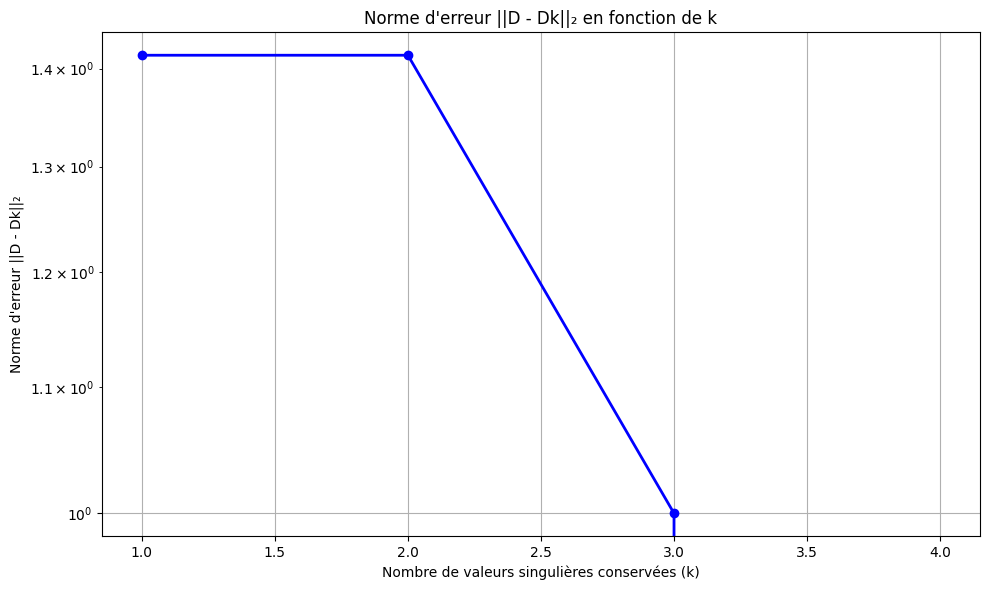

In [117]:
plot_norme_erreur(matrice , None)

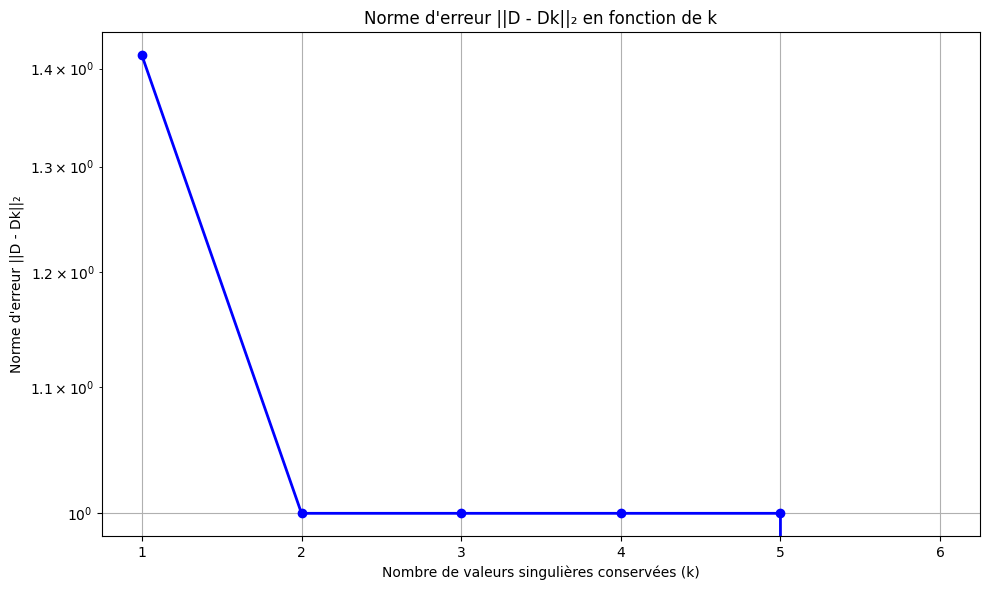

In [118]:
plot_norme_erreur(matrice_exemple_3, None)

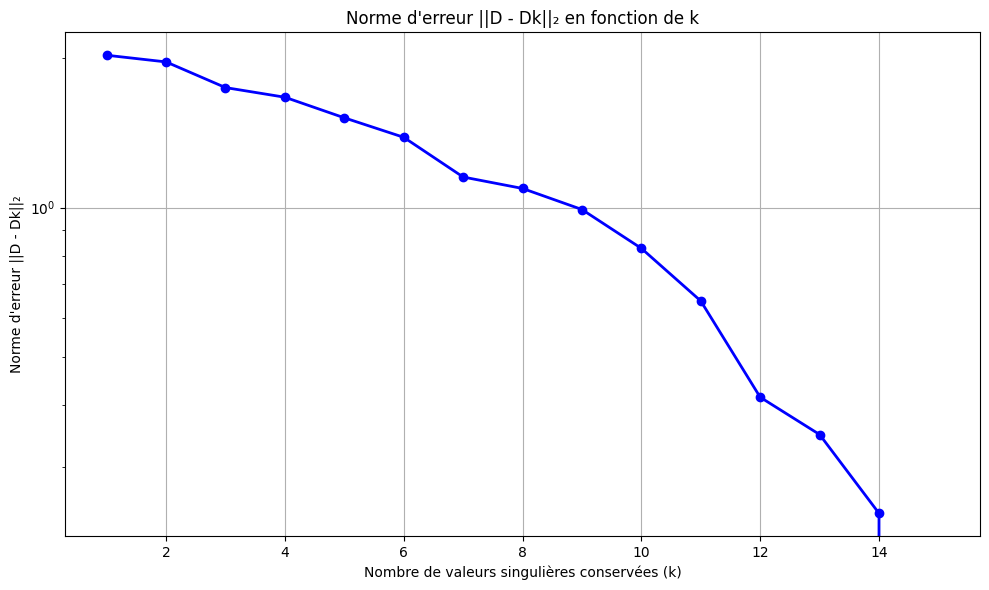

In [119]:
#Matrice aléatoire de test : 
np.random.seed(42)
m, n = 20, 15
matrice_alea = np.random.rand(m, n)
    
erreurs = plot_norme_erreur(matrice_alea , 15)
    

In [120]:
# Norme d'erreur en pour bidiagonalisation + QR
def norme_erreur_bidiagonale_qr(D , k):
    U , B , V = bidiagonale(D)
    U_bdiag , S_bdiag , V_tbdiag = qr_bidiagonal(B , U ,V)
    U_k , Sk , V_tk = approximation_k(k , U_bdiag , S_bdiag , V_tbdiag)
    Dk = U_k @ Sk @ V_tk
    return np.linalg.norm(D - Dk, ord=2)
    

In [121]:
def plot_norme_erreur_bidiagonale_qr(matrice, max_k):
    if max_k is None:
        max_k = min(matrice.shape)
    erreurs = []
    for k in range(1, max_k + 1):
        erreur = norme_erreur_bidiagonale_qr(matrice, k)
        erreurs.append(erreur)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), erreurs, 'bo-', linewidth=2)
    plt.title('Norme d\'erreur ||D - Dk||₂ en fonction de k (Bidiagonalisation + QR)')
    plt.xlabel('Nombre de valeurs singulières conservées (k)')
    plt.ylabel('Norme d\'erreur ||D - Dk||₂')
    plt.grid(True)
    plt.yscale('log')  # Échelle logarithmique pour mieux visualiser la décroissance
    plt.tight_layout()
    plt.show()  

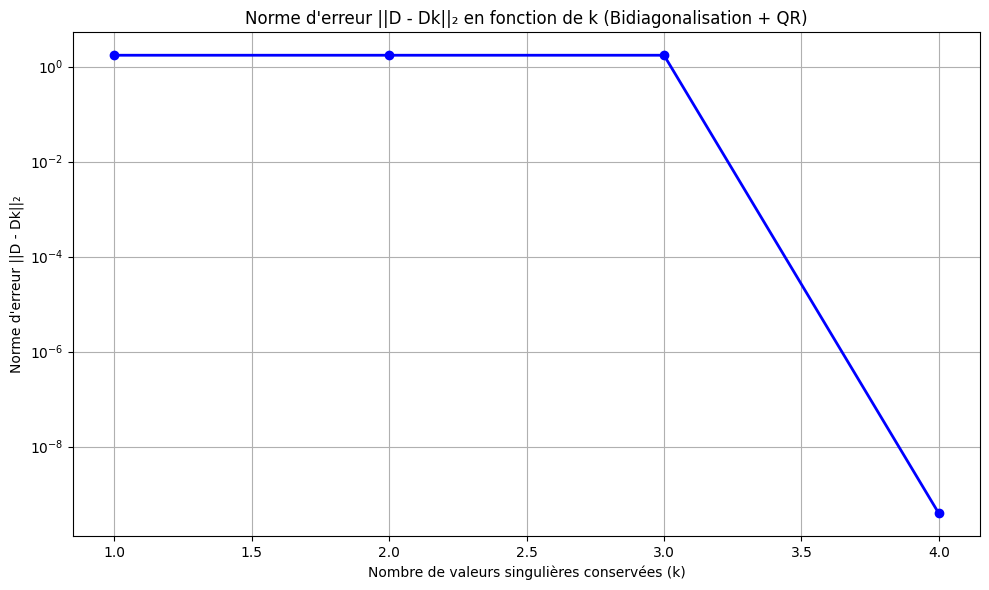

In [122]:
# Test de la norme d'erreur EXEMPLE 1
plot_norme_erreur_bidiagonale_qr(matrice , None)

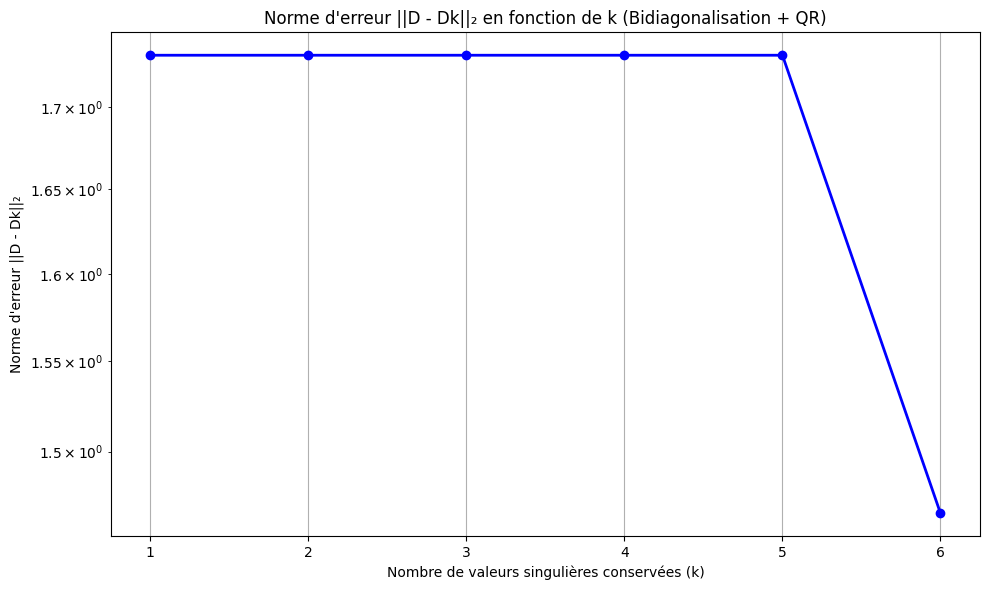

In [123]:
# Test de la norme d'erreur EXEMPLE 3
plot_norme_erreur_bidiagonale_qr(matrice_exemple_3 , None)

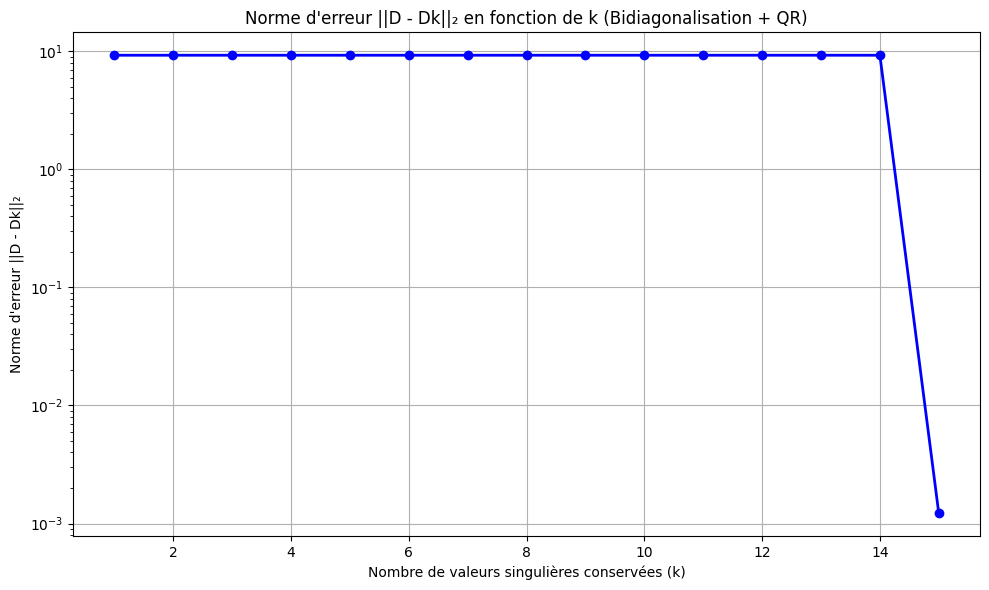

In [124]:
# Matrice aléatoire de test :
#Matrice aléatoire de test : 
np.random.seed(42)
m, n = 20, 15
#Creer une matrice aléa D contenant que des 0 et 1

matrice_alea = np.random.randint(0, 2, size=(m, n))
    
erreurs = plot_norme_erreur_bidiagonale_qr(matrice_alea , 15)
    

##### Comparaison des résultats de l'exemple 3

In [125]:
requete_qr_bidiagonale(matrice_exemple_3 , 10, vecteur_colonne_exemple_3_1)

SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 0.71
Document 2 : 0.71
Document 3 : 0.71
Document 5 : 0.71
Document 8 : 0.71
Document 10 : 0.71

Aucun document disponible pour évaluation ou score maximum inférieur à 0.8


In [126]:
requete_SVD(matrice_exemple_3 , 10, vecteur_colonne_exemple_3_1)

SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 1 : 0.71
Document 2 : 0.71
Document 3 : 0.71
Document 8 : 0.5

Aucun document disponible pour évaluation ou score maximum inférieur à 0.8


In [127]:
resultat_requete(matrice_exemple_3, vecteur_colonne_exemple_3_1, score_min = 0.8)

Document 1 : 0.71
Document 2 : 0.71
Document 3 : 0.71
Document 8 : 0.5

Aucun document disponible pour évaluation ou score insuffisant


#### Variation de nb Matrice termes-documents et résultats sur le temps d'éxécution

In [128]:


# Mesure et traçage des temps d'exécution
def plot_execution_time(functions):
    # Valeurs de Nd (5, 10, ..., 200)
    Nd_values = np.arange(5, 205, 5)
    execution_times = {func.__name__: [] for func in functions}
    valid_Nd = []
    
    # Mesurer le temps pour chaque Nd
    for Nd in Nd_values:
        # Calculer Nt = 3 * Nd
        Nt = 3 * Nd
        # Créer une matrice de zéros de taille Nt x Nd
        try:
            matrice = np.zeros((Nt, Nd))
            valid = True
            times = {}
            
            # Tester chaque fonction
            for func in functions:
                start_time = time.time()
                result = func(matrice)
                end_time = time.time()
                
                if result is not None:
                    execution_time = end_time - start_time
                    times[func.__name__] = execution_time
                else:
                    print(f"Échec de {func.__name__} pour Nd={Nd}, Nt={Nt}")
                    valid = False
                    break
            
            # Enregistrer les temps si toutes les fonctions ont réussi
            if valid:
                for func in functions:
                    execution_times[func.__name__].append(times[func.__name__])
                valid_Nd.append(Nd)
        except Exception as e:
            print(f"Erreur pour Nd={Nd}, Nt={Nt} : {e}")
            continue
    
    if not valid_Nd:
        print("Aucune mesure valide n'a été enregistrée.")
        return
    
    # Créer le graphique
    plt.figure(figsize=(12, 7))
    colors = ['b', 'r', 'g']
    for i, func in enumerate(functions):
        plt.plot(valid_Nd, execution_times[func.__name__], f'{colors[i]}-o', 
                label=f'{func.__name__}')
    plt.xlabel('Nd (Nb colonnes)')
    plt.ylabel('Temps d\'exécution (secondes)')
    plt.title('Comparaison des temps d\'exécution de trois fonctions SVD (Nt = 3*Nd)')
    plt.grid(True)
    plt.legend()
    
    # Sauvegarder le graphique
    plt.savefig('execution_time_svd_comparison.png')
    plt.show()

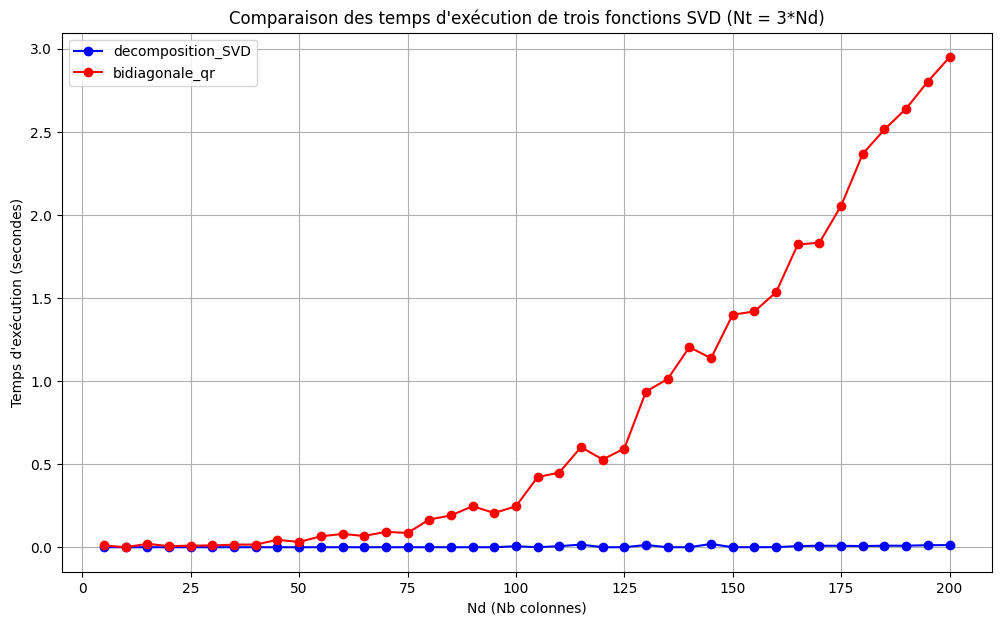

In [129]:
functions = [decomposition_SVD, bidiagonale_qr , ]
plot_execution_time(functions)

#### Etude de cas : documents.txt

In [130]:
documents_fich = []
termes_fich = set()

with open("documents.txt", "r", encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if line:
            # Séparer le numéro du reste du document
            parts = line.split(' ', 1)
            
            if len(parts) > 1:
                # Ajouter seulement le contenu (sans le numéro) à la liste des documents
                documents_fich.append(parts[1])
                
                # Ajouter les termes à l'ensemble des termes
                termes = parts[1].split()
                for terme in termes:
                    termes_fich.add(terme.lower())

# Tri alphabétique des termes
termes_fich= sorted(termes_fich)

In [131]:
mat_fich = matrice_termes_documents(termes_fich, documents_fich)
mat_fich.shape , len(termes_fich) , len(documents_fich)

((75, 1000), 75, 1000)

In [132]:
#Test des methodes (Sans utilisation de la décomposition SVD) :
requete_fich = "java python"
vecteur_colonne_fich = requete_vers_colonne(termes_fich, requete_fich)

print("\n-------------TRAITEMENT---------------\n")
requete_SVD(mat_fich , 62 , vecteur_colonne_fich)


-------------TRAITEMENT---------------

SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 935 : 0.85
Document 571 : 0.8
Document 33 : 0.7
Document 380 : 0.7
Document 589 : 0.7
Document 926 : 0.69
Document 24 : 0.67
Document 613 : 0.67
Document 931 : 0.67
Document 565 : 0.66
Document 604 : 0.66
Document 528 : 0.65
Document 949 : 0.64
Document 892 : 0.63
Document 777 : 0.59
Document 410 : 0.58
Document 446 : 0.58
Document 972 : 0.57
Document 137 : 0.55
Document 45 : 0.52
Document 73 : 0.49
Document 510 : 0.47
Document 678 : 0.47
Document 328 : 0.46
Document 464 : 0.46
Document 536 : 0.46
Document 868 : 0.46
Document 287 : 0.44
Document 376 : 0.44
Document 509 : 0.44
Document 739 : 0.44
Document 443 : 0.42
Document 906 : 0.42
Document 180 : 0.41
Document 346 : 0.41
Document 347 : 0.41
Document 365 : 0.41
Document 765 : 0.41
Document 104 : 0.4
Document 274 : 0.4
Document 16 : 0.39
Document 182 : 0.39
Document 575 : 0.39
Document 923 : 0.39
Document 633 :

In [133]:
#sans SVD
resultat_requete(mat_fich, vecteur_colonne_fich, score_min = 0.8)

Document 24 : 0.63
Document 33 : 0.63
Document 380 : 0.63
Document 446 : 0.63
Document 565 : 0.63
Document 571 : 0.63
Document 589 : 0.63
Document 604 : 0.63
Document 613 : 0.63
Document 777 : 0.63
Document 892 : 0.63
Document 926 : 0.63
Document 931 : 0.63
Document 935 : 0.63
Document 949 : 0.63
Document 16 : 0.32
Document 22 : 0.32
Document 45 : 0.32
Document 63 : 0.32
Document 73 : 0.32
Document 90 : 0.32
Document 104 : 0.32
Document 129 : 0.32
Document 137 : 0.32
Document 139 : 0.32
Document 158 : 0.32
Document 180 : 0.32
Document 182 : 0.32
Document 203 : 0.32
Document 261 : 0.32
Document 262 : 0.32
Document 274 : 0.32
Document 287 : 0.32
Document 306 : 0.32
Document 309 : 0.32
Document 319 : 0.32
Document 328 : 0.32
Document 346 : 0.32
Document 347 : 0.32
Document 365 : 0.32
Document 376 : 0.32
Document 405 : 0.32
Document 410 : 0.32
Document 413 : 0.32
Document 431 : 0.32
Document 443 : 0.32
Document 464 : 0.32
Document 501 : 0.32
Document 505 : 0.32
Document 509 : 0.32
Document

In [134]:
#bidiagonalisation + QR
requete_qr_bidiagonale(mat_fich , 75, vecteur_colonne_fich)

SCORE MIN : 0.8
Documents avec un score > 0 (triés par score décroissant) :
Document 949 : 0.64
Document 24 : 0.63
Document 33 : 0.63
Document 380 : 0.63
Document 446 : 0.63
Document 565 : 0.63
Document 589 : 0.63
Document 604 : 0.63
Document 613 : 0.63
Document 777 : 0.63
Document 892 : 0.63
Document 926 : 0.63
Document 931 : 0.63
Document 571 : 0.62
Document 935 : 0.62
Document 139 : 0.34
Document 63 : 0.33
Document 431 : 0.33
Document 505 : 0.33
Document 625 : 0.33
Document 657 : 0.33
Document 660 : 0.33
Document 662 : 0.33
Document 703 : 0.33
Document 759 : 0.33
Document 829 : 0.33
Document 894 : 0.33
Document 957 : 0.33
Document 993 : 0.33
Document 16 : 0.32
Document 22 : 0.32
Document 73 : 0.32
Document 90 : 0.32
Document 129 : 0.32
Document 158 : 0.32
Document 182 : 0.32
Document 203 : 0.32
Document 261 : 0.32
Document 262 : 0.32
Document 274 : 0.32
Document 306 : 0.32
Document 309 : 0.32
Document 319 : 0.32
Document 328 : 0.32
Document 346 : 0.32
Document 347 : 0.32
Document 36